In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
trans = pd.read_csv('OSM/seasonal_transport.csv')
trans

,Unnamed: 0,section,s17,s18,s19,s20,s21,w17,w18,w19,w20
0,0,North,36001.407662,20739.513205,29694.396204,29249.933502,23714.547157,1222.510471,4075.179788,105.115077,1599.091127
1,1,Offshore,56938.926803,29584.436351,38934.594586,27681.862287,25807.576775,1102.182301,10431.624431,19031.378979,20504.766745
2,2,CUC,32366.554171,53653.118618,44512.177371,49871.143779,58169.463249,35862.749498,27241.888892,21271.018649,22490.881776
3,3,South,11834.052282,12589.428811,2468.254059,6811.668102,10754.783813,39786.676481,35523.825779,31048.652935,34949.001668
4,4,Columbia,366.012450,6109.751725,955.977302,2160.731477,1653.526224,22537.884565,14764.130187,17929.440577,16163.981853
5,5,loop,39988.132894,44638.056786,42853.733619,43595.769762,45740.702593,53822.452719,49359.508083,48512.583298,58123.358084


In [3]:
# lets look at the sections as indexes for ease of analysis
nor = 0
off = 1
cuc = 2
sou = 3
col = 4
loo = 5

In [4]:
tracers = pd.read_csv('./OSM/tracers.csv')
tracers.head()

,Unnamed: 0,salt,temperature,NO3,oxygen,transport,depth,season,year,section
0,3,30.715387,9.134833,15.741662,270.217407,0.002187,18.089465,summer,2017.0,loop
1,51,27.029570,10.487689,4.025189,321.115540,0.002511,2.196340,summer,2017.0,loop
2,101,29.024899,9.943184,7.286023,311.617767,0.002381,5.138868,summer,2017.0,loop
3,2690,29.043703,9.957072,7.441795,310.305695,0.002384,5.637972,summer,2017.0,loop
4,2790,28.461721,10.375201,4.149877,316.328979,0.002484,17.259097,summer,2017.0,loop


# Summer

In [5]:
# summer mean
Snorth = np.mean([trans.s17[nor],trans.s18[nor],trans.s19[nor],trans.s20[nor],trans.s21[nor]])
Ssouth = np.mean([trans.s17[sou],trans.s18[sou],trans.s19[sou],trans.s20[sou],trans.s21[sou]])
Soffshore = np.mean([trans.s17[off],trans.s18[off],trans.s19[off],trans.s20[off],trans.s21[off]])
Scuc = np.mean([trans.s17[cuc],trans.s18[cuc],trans.s19[cuc],trans.s20[cuc],trans.s21[cuc]])
Scol = np.mean([trans.s17[col],trans.s18[col],trans.s19[col],trans.s20[col],trans.s21[col]])
Sloop = np.mean([trans.s17[loo],trans.s18[loo],trans.s19[loo],trans.s20[loo],trans.s21[loo]])

/tmp/ipykernel_162697/1255929914.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(sources,rotation=30, ha='right')


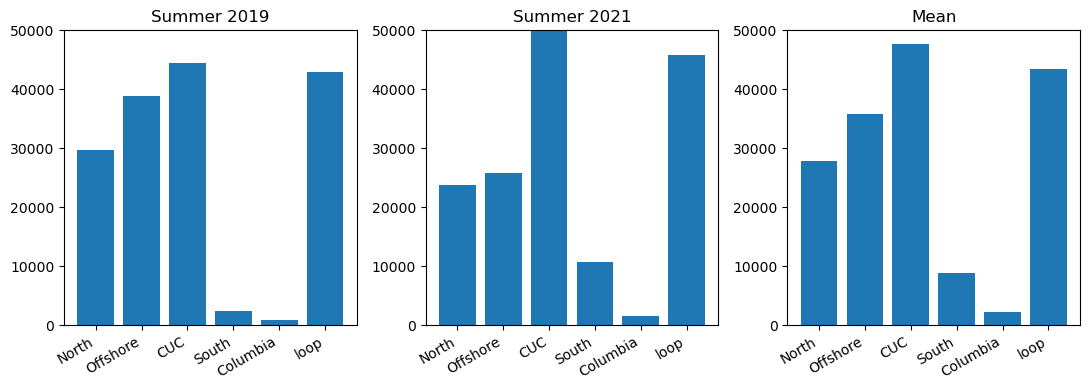

In [6]:
fig, ax = plt.subplots(1,3,figsize=(11,4))

sources = ['North','Offshore','CUC','South','Columbia','loop']

ax[0].bar(sources,[trans.s19[nor],trans.s19[off],trans.s19[cuc],trans.s19[sou],trans.s19[col],trans.s19[loo]])
ax[1].bar(sources,[trans.s21[nor],trans.s21[off],trans.s21[cuc],trans.s21[sou],trans.s21[col],trans.s21[loo]])
ax[2].bar(sources,[Snorth,Soffshore,Scuc,Ssouth,Scol,Sloop])

ax[0].set_title('Summer 2019') # high O2 summer
ax[1].set_title('Summer 2021') # hypoxia summer
ax[2].set_title('Mean')

for axs in ax:
    axs.set_ylim([0,50000])
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()

In [7]:
np.array([Snorth,Soffshore,Scuc,Ssouth,Scol,Sloop])/1000

array([27.87995955, 35.78947936, 47.71449144,  8.89163741,  2.24919984,
       43.36327913])

159.4191331398549
165.8405998121071
165.88804672424234


/tmp/ipykernel_162697/2437448247.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(sources,rotation=30, ha='right')


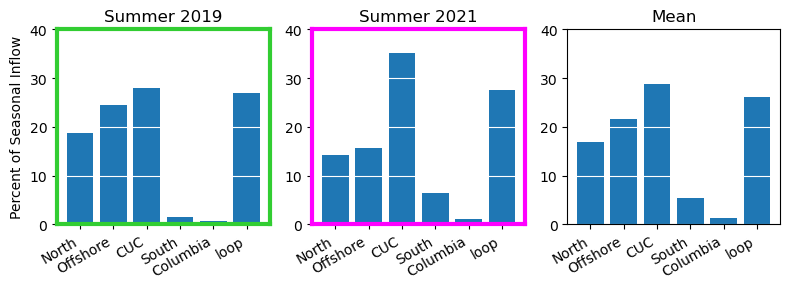

In [26]:
# same thing but percentages
fig, ax = plt.subplots(1,3,figsize=(8,3))

sources = ['North','Offshore','CUC','South','Columbia','loop']

total = np.sum([trans.s19[nor],trans.s19[off],trans.s19[cuc],trans.s19[sou],trans.s19[col],trans.s19[loo]])
print(total/1000)
ax[0].bar(sources,[100*(trans.s19[nor]/total),100*(trans.s19[off]/total),100*(trans.s19[cuc]/total),100*(trans.s19[sou]/total),100*(trans.s19[col]/total),100*(trans.s19[loo]/total)])
total = np.sum([trans.s21[nor],trans.s21[off],trans.s21[cuc],trans.s21[sou],trans.s21[col],trans.s21[loo]])
print(total/1000)
ax[1].bar(sources,[(trans.s21[nor]/total)*100,(trans.s21[off]/total)*100,(trans.s21[cuc]/total)*100,(trans.s21[sou]/total)*100,(trans.s21[col]/total)*100,(trans.s21[loo]/total)*100])
total = np.sum([Snorth,Soffshore,Scuc,Ssouth,Scol,Sloop])
print(total/1000)
ax[2].bar(sources,[(Snorth/total)*100,(Soffshore/total)*100,(Scuc/total)*100,(Ssouth/total)*100,(Scol/total)*100,(Sloop/total)*100])

ax[0].set_title('Summer 2019') # high O2 summer
ax[1].set_title('Summer 2021') # hypoxia summer
ax[2].set_title('Mean')
ax[0].set_ylabel('Percent of Seasonal Inflow')

for axs in ax:
    axs.set_ylim([0,40])
    axs.set_xticklabels(sources,rotation=30, ha='right')
    axs.grid(axis='y',color='w')

#make border match dot colour
for spine in ax[0].spines.values():
        spine.set_edgecolor('limegreen')
        spine.set_linewidth(3)

#make border match dot colour
for spine in ax[1].spines.values():
        spine.set_edgecolor('magenta')
        spine.set_linewidth(3)

plt.tight_layout()
# plt.savefig("./figures/summerbar.jpg")


/tmp/ipykernel_162697/4143928808.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sources,rotation=30, ha='right')


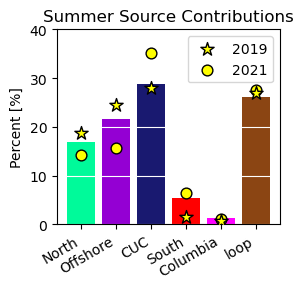

In [19]:
# same thing but just one bar plot and colour coding
fig, ax = plt.subplots(1,1,figsize=(3,3))

sources = ['North','Offshore','CUC','South','Columbia','loop']
colours = ['mediumspringgreen','darkviolet','midnightblue','red','magenta','saddlebrown'] 

total = np.sum([trans.s19[nor],trans.s19[off],trans.s19[cuc],trans.s19[sou],trans.s19[col],trans.s19[loo]])
ax.scatter(sources,[100*(trans.s19[nor]/total),100*(trans.s19[off]/total),100*(trans.s19[cuc]/total),100*(trans.s19[sou]/total),100*(trans.s19[col]/total),100*(trans.s19[loo]/total)],zorder=3,marker='*',edgecolors='k',s=100,color='yellow', label='2019')
total = np.sum([trans.s21[nor],trans.s21[off],trans.s21[cuc],trans.s21[sou],trans.s21[col],trans.s21[loo]])
ax.scatter(sources,[(trans.s21[nor]/total)*100,(trans.s21[off]/total)*100,(trans.s21[cuc]/total)*100,(trans.s21[sou]/total)*100,(trans.s21[col]/total)*100,(trans.s21[loo]/total)*100],zorder=2,marker='o',edgecolors='k',s=60,color='yellow', label='2021')
total = np.sum([Snorth,Soffshore,Scuc,Ssouth,Scol,Sloop])
ax.bar(sources,[(Snorth/total)*100,(Soffshore/total)*100,(Scuc/total)*100,(Ssouth/total)*100,(Scol/total)*100,(Sloop/total)*100],color=colours,zorder=1)

ax.set_title('Summer Source Contributions')
ax.set_ylabel('Percent [%]')
ax.set_ylim([0,40])
ax.set_xticklabels(sources,rotation=30, ha='right')
ax.grid(axis='y',color='w')
ax.legend()

plt.tight_layout()
plt.savefig("./figures/summerbar.jpg")


In [10]:
summer_salt = [tracers.salt[(tracers.section=='north')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='offshore')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='cuc')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='south')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='columbia')&(tracers.season=='summer')],
               tracers.salt[(tracers.section=='loop')&(tracers.season=='summer')]]

s19_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)])]

s21_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)])]

summer_temp = [tracers.temperature[(tracers.section=='north')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='offshore')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='cuc')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='south')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='columbia')&(tracers.season=='summer')],
               tracers.temperature[(tracers.section=='loop')&(tracers.season=='summer')]]

s19_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)])]

s21_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)])]

summer_no3 = [tracers.NO3[(tracers.section=='north')&(tracers.season=='summer')],
               tracers.NO3[(tracers.section=='offshore')&(tracers.season=='summer')],
               tracers.NO3[(tracers.section=='cuc')&(tracers.season=='summer')],
               tracers.NO3[(tracers.section=='south')&(tracers.season=='summer')],
               tracers.NO3[(tracers.section=='columbia')&(tracers.season=='summer')],
               tracers.NO3[(tracers.section=='loop')&(tracers.season=='summer')]]

s19_no3 = [np.average(tracers.NO3[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.NO3[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.NO3[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.NO3[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.NO3[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.NO3[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)])]

s21_no3 = [np.average(tracers.NO3[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.NO3[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.NO3[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.NO3[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.NO3[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.NO3[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)])]

summer_oxy = [tracers.oxygen[(tracers.section=='north')&(tracers.season=='summer')],
               tracers.oxygen[(tracers.section=='offshore')&(tracers.season=='summer')],
               tracers.oxygen[(tracers.section=='cuc')&(tracers.season=='summer')],
               tracers.oxygen[(tracers.section=='south')&(tracers.season=='summer')],
               tracers.oxygen[(tracers.section=='columbia')&(tracers.season=='summer')],
               tracers.oxygen[(tracers.section=='loop')&(tracers.season=='summer')]]

s19_oxy = [np.average(tracers.oxygen[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.oxygen[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.oxygen[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.oxygen[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.oxygen[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2019)]),
               np.average(tracers.oxygen[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2019)])]

s21_oxy = [np.average(tracers.oxygen[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.oxygen[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.oxygen[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.oxygen[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.oxygen[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='summer')&(tracers.year==2021)]),
               np.average(tracers.oxygen[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='summer')&(tracers.year==2021)])]

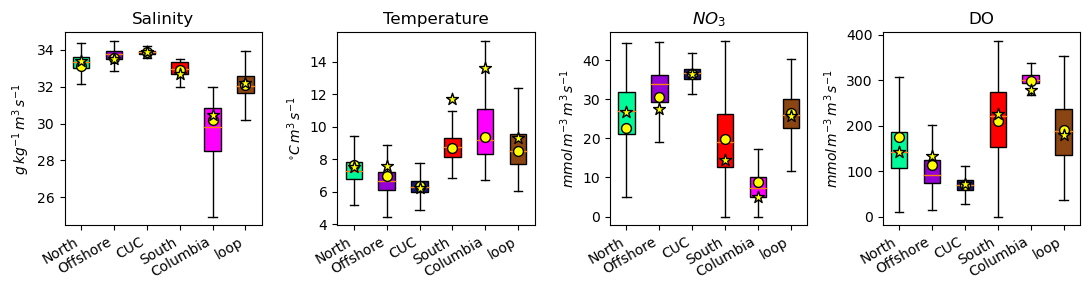

In [11]:
# box limits are quartiles
# first quartile (Q1), is the value under which 25% of data points are found when they are arranged in increasing order
# third quartile (Q3), is the value under which 75% of data points are found when arranged in increasing order
# the whiskers are based on the equation Q3 + whis*(Q3-Q1) and Q1 - whis*(Q3-Q1)

fig, ax = plt.subplots(1,4,figsize=(11,3))

# salt
bplot1 = ax[0].boxplot(summer_salt,showfliers=False,patch_artist=True)
ax[0].set_xticklabels(sources)
ax[0].set_title('Salinity')
ax[0].set_ylabel('$g\, kg^{-1}\, m^3\, s^{-1}$')

# temp
bplot2 = ax[1].boxplot(summer_temp,showfliers=False,patch_artist=True)
ax[1].set_xticklabels(sources)
ax[1].set_title('Temperature')
ax[1].set_ylabel('$^{\circ}C\, m^3\, s^{-1}$')

# no3
bplot3 = ax[2].boxplot(summer_no3,showfliers=False,patch_artist=True)
ax[2].set_xticklabels(sources)
ax[2].set_title('$NO_3$')
ax[2].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# oxygen
bplot4 = ax[3].boxplot(summer_oxy,showfliers=False,patch_artist=True)
ax[3].set_xticklabels(sources)
ax[3].set_title('DO')
ax[3].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# fill with colors
colors = colours
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# year of interest
ax[0].scatter(np.arange(6)+1, s19_salt, color='yellow', edgecolor='k', marker='*',s=80,zorder=4, label='Summer 2019')
ax[1].scatter(np.arange(6)+1,s19_temp, color='yellow', edgecolor='k', marker='*',s=80,zorder=4)
ax[2].scatter(np.arange(6)+1,s19_no3, color='yellow', edgecolor='k', marker='*',s=80,zorder=4)
ax[3].scatter(np.arange(6)+1,s19_oxy, color='yellow', edgecolor='k', marker='*',s=80,zorder=4)

ax[0].scatter(np.arange(6)+1,s21_salt, color='yellow',edgecolor='k',marker='o', s=50, zorder=3, label='Summer 2021')
ax[1].scatter(np.arange(6)+1,s21_temp, color='yellow',edgecolor='k',marker='o', s=50, zorder=3)
ax[2].scatter(np.arange(6)+1,s21_no3, color='yellow',edgecolor='k',marker='o', s=50, zorder=3)
ax[3].scatter(np.arange(6)+1,s21_oxy, color='yellow',edgecolor='k',marker='o', s=50, zorder=3)

# ax[0].legend()

for axs in ax:
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()
plt.savefig("./figures/summerbox.jpg")


In [12]:
# winter mean
Wnorth = np.mean([trans.w17[nor],trans.w18[nor],trans.w19[nor],trans.w20[nor]])
Wsouth = np.mean([trans.w17[sou],trans.w18[sou],trans.w19[sou],trans.w20[sou]])
Woffshore = np.mean([trans.w17[off],trans.w18[off],trans.w19[off],trans.w20[off]])
Wcuc = np.mean([trans.w17[cuc],trans.w18[cuc],trans.w19[cuc],trans.w20[cuc]])
Wcol = np.mean([trans.w17[col],trans.w18[col],trans.w19[col],trans.w20[col]])
Wloop = np.mean([trans.w17[loo],trans.w18[loo],trans.w19[loo],trans.w20[loo]])

/tmp/ipykernel_162697/1031146654.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(sources,rotation=30, ha='right')


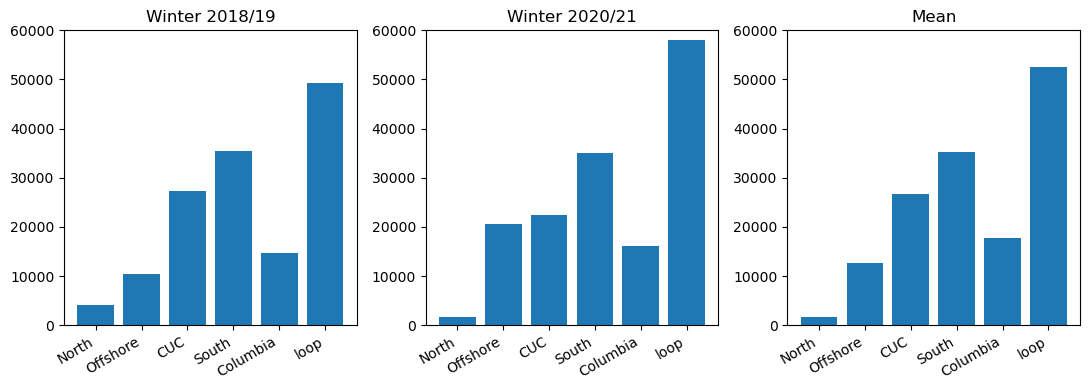

In [13]:
fig, ax = plt.subplots(1,3,figsize=(11,4))

sources = ['North','Offshore','CUC','South','Columbia','loop']

ax[0].bar(sources,[trans.w18[nor],trans.w18[off],trans.w18[cuc],trans.w18[sou],trans.w18[col],trans.w18[loo]])
ax[1].bar(sources,[trans.w20[nor],trans.w20[off],trans.w20[cuc],trans.w20[sou],trans.w20[col],trans.w20[loo]])
ax[2].bar(sources,[Wnorth, Woffshore,Wcuc,Wsouth,Wcol,Wloop])

ax[0].set_title('Winter 2018/19') # strong downwelling winter
ax[1].set_title('Winter 2020/21') # weak downwelling winter
ax[2].set_title('Mean')

for axs in ax:
    axs.set_ylim([0,60000])
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()

In [14]:
np.array([Wnorth, Woffshore,Wcuc,Wsouth,Wcol,Wloop])/1000

array([ 1.75047412, 12.76748811, 26.7166347 , 35.32703922, 17.8488593 ,
       52.45447555])

141.396157159187
153.83108125220568
146.8649709905386


/tmp/ipykernel_162697/521791707.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(sources,rotation=30, ha='right')


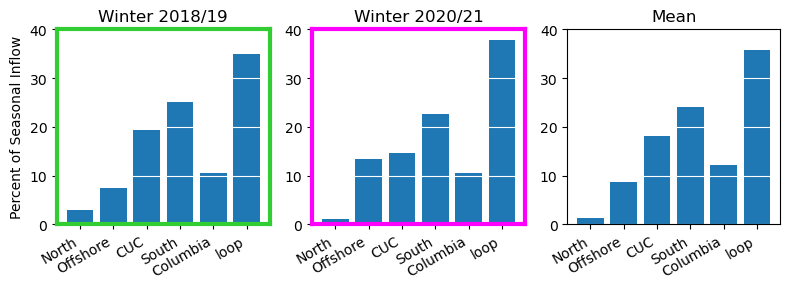

In [27]:
# same thing but percentages
fig, ax = plt.subplots(1,3,figsize=(8,3))

sources = ['North','Offshore','CUC','South','Columbia','loop']

total = np.sum([trans.w18[nor],trans.w18[off],trans.w18[cuc],trans.w18[sou],trans.w18[col],trans.w18[loo]])
print(total/1000)
ax[0].bar(sources,[100*(trans.w18[nor]/total),100*(trans.w18[off]/total),100*(trans.w18[cuc]/total),100*(trans.w18[sou]/total),100*(trans.w18[col]/total),100*(trans.w18[loo]/total)])
total = np.sum([trans.w20[nor],trans.w20[off],trans.w20[cuc],trans.w20[sou],trans.w20[col],trans.w20[loo]])
print(total/1000)
ax[1].bar(sources,[(trans.w20[nor]/total)*100,(trans.w20[off]/total)*100,(trans.w20[cuc]/total)*100,(trans.w20[sou]/total)*100,(trans.w20[col]/total)*100,(trans.w20[loo]/total)*100])
total = np.sum([Wnorth, Woffshore,Wcuc,Wsouth,Wcol,Wloop])
print(total/1000)
ax[2].bar(sources,[(Wnorth/total)*100,(Woffshore/total)*100,(Wcuc/total)*100,(Wsouth/total)*100,(Wcol/total)*100,(Wloop/total)*100])

ax[0].set_title('Winter 2018/19') # strong downwelling winter
ax[1].set_title('Winter 2020/21') # weak downwelling winter
ax[2].set_title('Mean')
ax[0].set_ylabel('Percent of Seasonal Inflow')

for axs in ax:
    axs.set_ylim([0,40])
    axs.set_xticklabels(sources,rotation=30, ha='right')
    axs.grid(axis='y',color='w')

#make border match dot colour
for spine in ax[0].spines.values():
        spine.set_edgecolor('limegreen')
        spine.set_linewidth(3)

#make border match dot colour
for spine in ax[1].spines.values():
        spine.set_edgecolor('magenta')
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig("./figures/winterbar.jpg")


/tmp/ipykernel_162697/1494902999.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sources,rotation=30, ha='right')


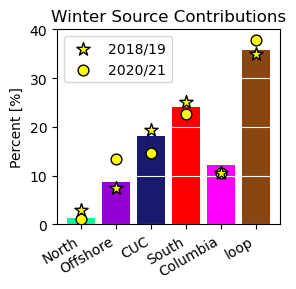

In [18]:
# same thing but just one bar plot and colour coding
fig, ax = plt.subplots(1,1,figsize=(3,3))

sources = ['North','Offshore','CUC','South','Columbia','loop']
colours = ['mediumspringgreen','darkviolet','midnightblue','red','magenta','saddlebrown'] 

total = np.sum([trans.w18[nor],trans.w18[off],trans.w18[cuc],trans.w18[sou],trans.w18[col],trans.w18[loo]])
ax.scatter(sources,[100*(trans.w18[nor]/total),100*(trans.w18[off]/total),100*(trans.w18[cuc]/total),100*(trans.w18[sou]/total),100*(trans.w18[col]/total),100*(trans.w18[loo]/total)],zorder=3,marker='*',edgecolors='k',s=100,color='yellow', label='2018/19')
total = np.sum([trans.w20[nor],trans.w20[off],trans.w20[cuc],trans.w20[sou],trans.w20[col],trans.w20[loo]])
ax.scatter(sources,[(trans.w20[nor]/total)*100,(trans.w20[off]/total)*100,(trans.w20[cuc]/total)*100,(trans.w20[sou]/total)*100,(trans.w20[col]/total)*100,(trans.w20[loo]/total)*100],zorder=2,marker='o',edgecolors='k',s=60,color='yellow', label='2020/21')
total = np.sum([Wnorth, Woffshore,Wcuc,Wsouth,Wcol,Wloop])
ax.bar(sources,[(Wnorth/total)*100,(Woffshore/total)*100,(Wcuc/total)*100,(Wsouth/total)*100,(Wcol/total)*100,(Wloop/total)*100],color=colours,zorder=1)

ax.set_title('Winter Source Contributions')
ax.set_ylabel('Percent [%]')
ax.set_ylim([0,40])
ax.set_xticklabels(sources,rotation=30, ha='right')
ax.grid(axis='y',color='w')

ax.legend()

plt.tight_layout()
plt.savefig("./figures/winterbar.jpg")

In [20]:
winter_salt = [tracers.salt[(tracers.section=='north')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='offshore')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='cuc')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='south')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='columbia')&(tracers.season=='winter')],
               tracers.salt[(tracers.section=='loop')&(tracers.season=='winter')]]

w18_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)])]

w20_salt = [np.average(tracers.salt[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.salt[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)])]

winter_temp = [tracers.temperature[(tracers.section=='north')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='offshore')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='cuc')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='south')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='columbia')&(tracers.season=='winter')],
               tracers.temperature[(tracers.section=='loop')&(tracers.season=='winter')]]

w18_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)])]

w20_temp = [np.average(tracers.temperature[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.temperature[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)])]

winter_no3 = [tracers.NO3[(tracers.section=='north')&(tracers.season=='winter')],
               tracers.NO3[(tracers.section=='offshore')&(tracers.season=='winter')],
               tracers.NO3[(tracers.section=='cuc')&(tracers.season=='winter')],
               tracers.NO3[(tracers.section=='south')&(tracers.season=='winter')],
               tracers.NO3[(tracers.section=='columbia')&(tracers.season=='winter')],
               tracers.NO3[(tracers.section=='loop')&(tracers.season=='winter')]]

w18_no3 = [np.average(tracers.NO3[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.NO3[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.NO3[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.NO3[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.NO3[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.NO3[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)])]

w20_no3 = [np.average(tracers.NO3[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.NO3[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.NO3[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.NO3[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.NO3[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.NO3[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)])]

winter_oxy = [tracers.oxygen[(tracers.section=='north')&(tracers.season=='winter')],
               tracers.oxygen[(tracers.section=='offshore')&(tracers.season=='winter')],
               tracers.oxygen[(tracers.section=='cuc')&(tracers.season=='winter')],
               tracers.oxygen[(tracers.section=='south')&(tracers.season=='winter')],
               tracers.oxygen[(tracers.section=='columbia')&(tracers.season=='winter')],
               tracers.oxygen[(tracers.section=='loop')&(tracers.season=='winter')]]

w18_oxy = [np.average(tracers.oxygen[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.oxygen[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.oxygen[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.oxygen[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.oxygen[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2018)]),
               np.average(tracers.oxygen[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2018)])]

w20_oxy = [np.average(tracers.oxygen[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='north')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.oxygen[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.oxygen[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.oxygen[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='south')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.oxygen[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')&(tracers.year==2020)]),
               np.average(tracers.oxygen[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)],weights=tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')&(tracers.year==2020)])]

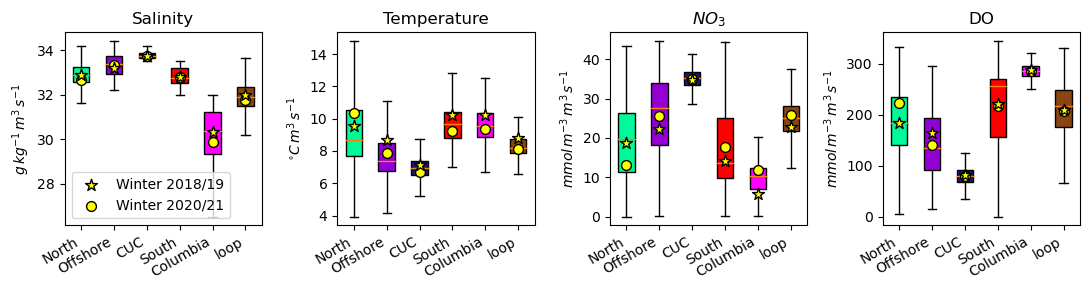

In [21]:
# box limits are quartiles
# first quartile (Q1), is the value under which 25% of data points are found when they are arranged in increasing order
# third quartile (Q3), is the value under which 75% of data points are found when arranged in increasing order
# the whiskers are based on the equation Q3 + whis*(Q3-Q1) and Q1 - whis*(Q3-Q1)

fig, ax = plt.subplots(1,4,figsize=(11,3))

# salt
bplot1 = ax[0].boxplot(winter_salt,showfliers=False,patch_artist=True)
ax[0].set_xticklabels(sources)
ax[0].set_title('Salinity')
ax[0].set_ylabel('$g\, kg^{-1}\, m^3\, s^{-1}$')

# temp
bplot2 = ax[1].boxplot(winter_temp,showfliers=False,patch_artist=True)
ax[1].set_xticklabels(sources)
ax[1].set_title('Temperature')
ax[1].set_ylabel('$^{\circ}C\, m^3\, s^{-1}$')

# no3
bplot3 = ax[2].boxplot(winter_no3,showfliers=False,patch_artist=True)
ax[2].set_xticklabels(sources)
ax[2].set_title('$NO_3$')
ax[2].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# oxygen
bplot4 = ax[3].boxplot(winter_oxy,showfliers=False,patch_artist=True)
ax[3].set_xticklabels(sources)
ax[3].set_title('DO')
ax[3].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# fill with colors
colors = colours
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# year of interest
ax[0].scatter(np.arange(6)+1, w18_salt, color='yellow', edgecolor='k', marker='*',s=80,zorder=4, label='Winter 2018/19')
ax[1].scatter(np.arange(6)+1,w18_temp, color='yellow', edgecolor='k', marker='*',s=80,zorder=4)
ax[2].scatter(np.arange(6)+1,w18_no3, color='yellow', edgecolor='k', marker='*',s=80,zorder=4)
ax[3].scatter(np.arange(6)+1,w18_oxy, color='yellow', edgecolor='k', marker='*',s=80,zorder=4)

ax[0].scatter(np.arange(6)+1,w20_salt, color='yellow',edgecolor='k',marker='o', s=50, zorder=3, label='Winter 2020/21')
ax[1].scatter(np.arange(6)+1,w20_temp, color='yellow',edgecolor='k',marker='o', s=50, zorder=3)
ax[2].scatter(np.arange(6)+1,w20_no3, color='yellow',edgecolor='k',marker='o', s=50, zorder=3)
ax[3].scatter(np.arange(6)+1,w20_oxy, color='yellow',edgecolor='k',marker='o', s=50, zorder=3)

ax[0].legend()

for axs in ax:
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()
plt.savefig("./figures/winterbox.jpg")

In [22]:
winter_tran = [np.array(tracers.transport[(tracers.section=='north')&(tracers.season=='winter')]),
               np.array(tracers.transport[(tracers.section=='offshore')&(tracers.season=='winter')]),
               np.array(tracers.transport[(tracers.section=='cuc')&(tracers.season=='winter')]),
               np.array(tracers.transport[(tracers.section=='south')&(tracers.season=='winter')]),
               np.array(tracers.transport[(tracers.section=='columbia')&(tracers.season=='winter')]),
               np.array(tracers.transport[(tracers.section=='loop')&(tracers.season=='winter')])]

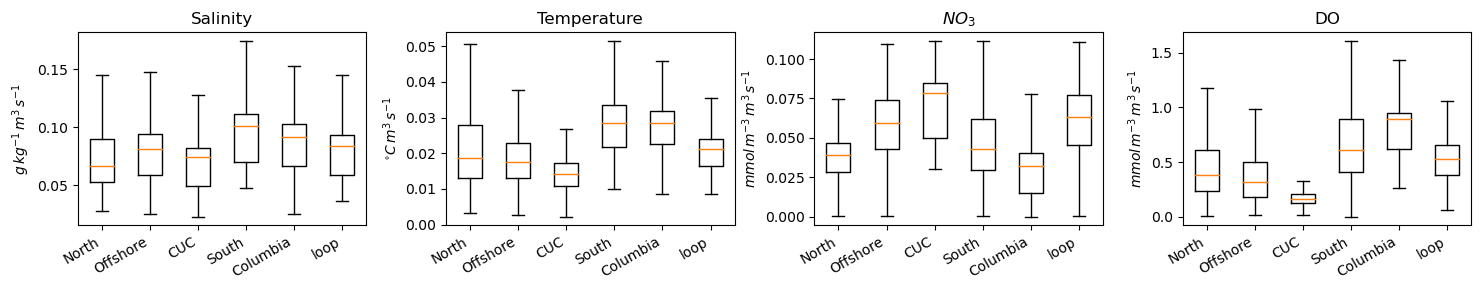

In [23]:
# same thing but weighted by transport
fig, ax = plt.subplots(1,4,figsize=(15,3))

# salt
ax[0].boxplot([winter_salt[i]*winter_tran[i] for i in range(len(winter_tran))],showfliers=False)
ax[0].set_xticklabels(sources)
ax[0].set_title('Salinity')
ax[0].set_ylabel('$g\, kg^{-1}\, m^3\, s^{-1}$')

# temp
ax[1].boxplot([winter_temp[i]*winter_tran[i] for i in range(len(winter_tran))],showfliers=False)
ax[1].set_xticklabels(sources)
ax[1].set_title('Temperature')
ax[1].set_ylabel('$^{\circ}C\, m^3\, s^{-1}$')

# no3
ax[2].boxplot([winter_no3[i]*winter_tran[i] for i in range(len(winter_tran))],showfliers=False)
ax[2].set_xticklabels(sources)
ax[2].set_title('$NO_3$')
ax[2].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# oxygen
ax[3].boxplot([winter_oxy[i]*winter_tran[i] for i in range(len(winter_tran))],showfliers=False)
ax[3].set_xticklabels(sources)
ax[3].set_title('DO')
ax[3].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# # year of interest
# ax[0].scatter(np.arange(6)+1, w18_salt, color='yellow', edgecolor='k', marker='*',s=100, label='Winter 2018/19')
# ax[1].scatter(np.arange(6)+1,w18_temp, color='yellow', edgecolor='k', marker='*',s=100)
# ax[2].scatter(np.arange(6)+1,w18_no3, color='yellow', edgecolor='k', marker='*',s=100)
# ax[3].scatter(np.arange(6)+1,w18_oxy, color='yellow', edgecolor='k', marker='*',s=100)

# ax[0].scatter(np.arange(6)+1,w20_salt, color='yellow',edgecolor='k',marker='o', s=60, label='Winter 2020/21')
# ax[1].scatter(np.arange(6)+1,w20_temp, color='yellow',edgecolor='k',marker='o', s=60)
# ax[2].scatter(np.arange(6)+1,w20_no3, color='yellow',edgecolor='k',marker='o', s=60)
# ax[3].scatter(np.arange(6)+1,w20_oxy, color='yellow',edgecolor='k',marker='o', s=60)

# ax[0].legend()

for axs in ax:
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()

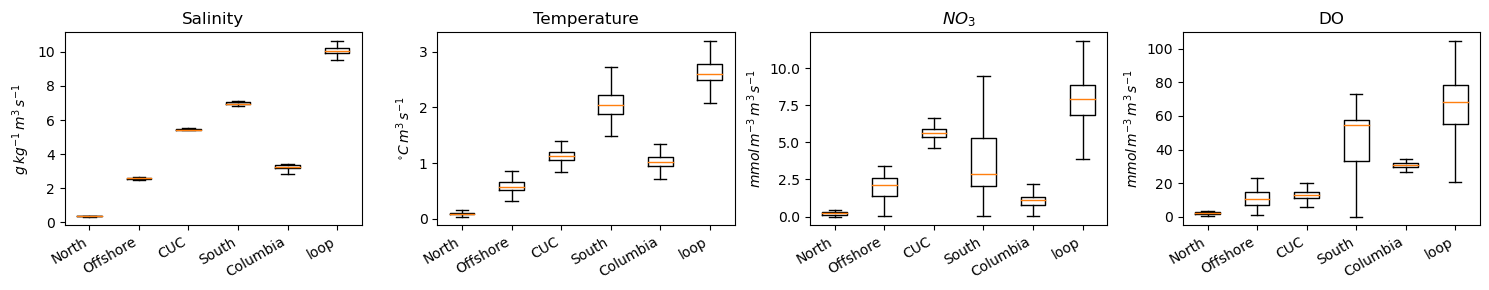

In [24]:
# same thing but normalized by mean transport
mean = [(Wnorth/total),(Woffshore/total),(Wcuc/total),(Wsouth/total),(Wcol/total),(Wloop/total)]

fig, ax = plt.subplots(1,4,figsize=(15,3))

# salt
ax[0].boxplot([winter_salt[i]*mean[i] for i in range(len(winter_tran))],showfliers=False)
ax[0].set_xticklabels(sources)
ax[0].set_title('Salinity')
ax[0].set_ylabel('$g\, kg^{-1}\, m^3\, s^{-1}$')

# temp
ax[1].boxplot([winter_temp[i]*mean[i] for i in range(len(winter_tran))],showfliers=False)
ax[1].set_xticklabels(sources)
ax[1].set_title('Temperature')
ax[1].set_ylabel('$^{\circ}C\, m^3\, s^{-1}$')

# no3
ax[2].boxplot([winter_no3[i]*mean[i] for i in range(len(winter_tran))],showfliers=False)
ax[2].set_xticklabels(sources)
ax[2].set_title('$NO_3$')
ax[2].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# oxygen
ax[3].boxplot([winter_oxy[i]*mean[i] for i in range(len(winter_tran))],showfliers=False)
ax[3].set_xticklabels(sources)
ax[3].set_title('DO')
ax[3].set_ylabel('$mmol\,m^{-3}\, m^3\, s^{-1}$')

# # year of interest
# ax[0].scatter(np.arange(6)+1, w18_salt, color='yellow', edgecolor='k', marker='*',s=100, label='Winter 2018/19')
# ax[1].scatter(np.arange(6)+1,w18_temp, color='yellow', edgecolor='k', marker='*',s=100)
# ax[2].scatter(np.arange(6)+1,w18_no3, color='yellow', edgecolor='k', marker='*',s=100)
# ax[3].scatter(np.arange(6)+1,w18_oxy, color='yellow', edgecolor='k', marker='*',s=100)

# ax[0].scatter(np.arange(6)+1,w20_salt, color='yellow',edgecolor='k',marker='o', s=60, label='Winter 2020/21')
# ax[1].scatter(np.arange(6)+1,w20_temp, color='yellow',edgecolor='k',marker='o', s=60)
# ax[2].scatter(np.arange(6)+1,w20_no3, color='yellow',edgecolor='k',marker='o', s=60)
# ax[3].scatter(np.arange(6)+1,w20_oxy, color='yellow',edgecolor='k',marker='o', s=60)

# ax[0].legend()

for axs in ax:
    axs.set_xticklabels(sources,rotation=30, ha='right')

plt.tight_layout()